<a href="https://colab.research.google.com/github/VarunKoduru/Machine-Learning/blob/main/ML_Assignment_2_185.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.spatial.distance import cdist

# Load dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# Preprocessing: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to compute silhouette score
def get_silhouette(model, X):
    labels = model.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1 and n_clusters < len(X):
        return silhouette_score(X, labels)
    return -1

# Baseline Models
print("=== Baseline Models ===")
kmeans_base = KMeans(n_clusters=3, random_state=42, n_init=10)
sil_kmeans_base = get_silhouette(kmeans_base, X_scaled)
print(f"Baseline K-means Silhouette: {sil_kmeans_base:.3f}")

dbscan_base = DBSCAN(eps=0.5, min_samples=5)
sil_dbscan_base = get_silhouette(dbscan_base, X_scaled)
print(f"Baseline DBSCAN Silhouette: {sil_dbscan_base:.3f}")

agglo_base = AgglomerativeClustering(n_clusters=3, linkage='ward')
sil_agglo_base = get_silhouette(agglo_base, X_scaled)
print(f"Baseline Agglomerative Silhouette: {sil_agglo_base:.3f}")



=== Baseline Models ===
Baseline K-means Silhouette: 0.285
Baseline DBSCAN Silhouette: -1.000
Baseline Agglomerative Silhouette: 0.277


In [17]:
# Hyperparameter Tuning
print("\n=== Hyperparameter Tuning ===")

# Tune K-means
best_sil_k = -1
best_k = 3
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    sil = get_silhouette(kmeans, X_scaled)
    print(f"K-means k={k}: {sil:.3f}")
    if sil > best_sil_k:
        best_sil_k = sil
        best_k = k
print(f"Tuned K-means: n_clusters={best_k}, Silhouette={best_sil_k:.3f}")



=== Hyperparameter Tuning ===
K-means k=2: 0.259
K-means k=3: 0.285
K-means k=4: 0.260
K-means k=5: 0.202
K-means k=6: 0.237
K-means k=7: 0.204
K-means k=8: 0.157
K-means k=9: 0.150
K-means k=10: 0.144
Tuned K-means: n_clusters=3, Silhouette=0.285


In [16]:
# Tune DBSCAN
best_sil_d = -1
best_eps, best_min = 0.5, 5
for eps in np.arange(0.1, 2.1, 0.1):
    for min_s in range(3, 11):
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        sil = get_silhouette(dbscan, X_scaled)
        if sil > best_sil_d:
            best_sil_d = sil
            best_eps = eps
            best_min = min_s
print(f"Tuned DBSCAN: eps={best_eps}, min_samples={best_min}, Silhouette={best_sil_d:.3f}")

# Tune Hierarchical
best_sil_a = -1
best_n, best_link = 3, 'ward'
linkages = ['ward', 'complete', 'average', 'single']
for n in range(2, 11):
    for link in linkages:
        try:
            agglo = AgglomerativeClustering(n_clusters=n, linkage=link)
            sil = get_silhouette(agglo, X_scaled)
            print(f"Agglo n={n}, link={link}: {sil:.3f}")
            if sil > best_sil_a:
                best_sil_a = sil
                best_n = n
                best_link = link
        except:
            continue
print(f"Tuned Agglomerative: n_clusters={best_n}, linkage={best_link}, Silhouette={best_sil_a:.3f}")


Tuned DBSCAN: eps=2.0, min_samples=3, Silhouette=0.031
Agglo n=2, link=ward: 0.267
Agglo n=2, link=complete: 0.162
Agglo n=2, link=average: 0.259
Agglo n=2, link=single: 0.222
Agglo n=3, link=ward: 0.277
Agglo n=3, link=complete: 0.204
Agglo n=3, link=average: 0.158
Agglo n=3, link=single: 0.183
Agglo n=4, link=ward: 0.226
Agglo n=4, link=complete: 0.194
Agglo n=4, link=average: 0.149
Agglo n=4, link=single: 0.181
Agglo n=5, link=ward: 0.187
Agglo n=5, link=complete: 0.188
Agglo n=5, link=average: 0.229
Agglo n=5, link=single: 0.142
Agglo n=6, link=ward: 0.180
Agglo n=6, link=complete: 0.175
Agglo n=6, link=average: 0.215
Agglo n=6, link=single: 0.121
Agglo n=7, link=ward: 0.187
Agglo n=7, link=complete: 0.189
Agglo n=7, link=average: 0.192
Agglo n=7, link=single: 0.050
Agglo n=8, link=ward: 0.188
Agglo n=8, link=complete: 0.191
Agglo n=8, link=average: 0.266
Agglo n=8, link=single: 0.025
Agglo n=9, link=ward: 0.192
Agglo n=9, link=complete: 0.178
Agglo n=9, link=average: 0.255
Agglo n

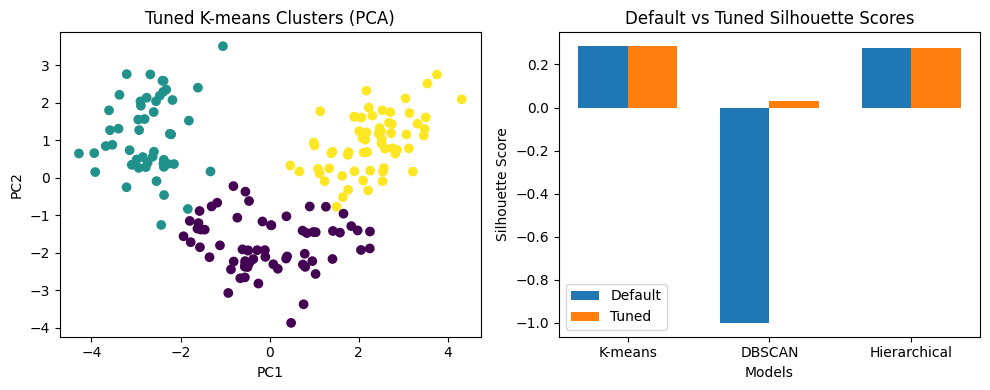

In [19]:
# Visualizations (example for tuned K-means)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans_tuned = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans_tuned.fit_predict(X_scaled)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Tuned K-means Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Bar plot for Silhouette comparison
models = ['K-means', 'DBSCAN', 'Hierarchical']
default_sil = [sil_kmeans_base, sil_dbscan_base, sil_agglo_base]
tuned_sil = [best_sil_k, best_sil_d, best_sil_a]
x = np.arange(len(models))
width = 0.35
plt.subplot(1, 2, 2)
plt.bar(x - width/2, default_sil, width, label='Default')
plt.bar(x + width/2, tuned_sil, width, label='Tuned')
plt.xlabel('Models')
plt.ylabel('Silhouette Score')
plt.title('Default vs Tuned Silhouette Scores')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()


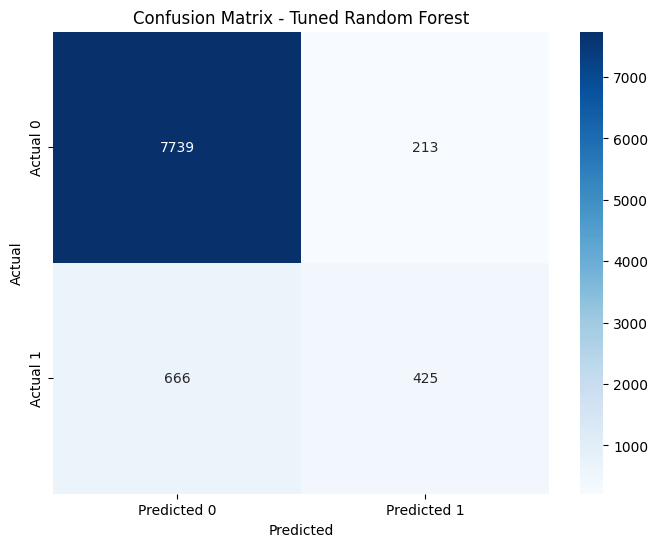


Classification Report - Tuned RF:

              precision    recall  f1-score   support

         False       0.92      0.97      0.95      7952
          True       0.67      0.39      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Hardcoded matrix based on report values
cm = np.array([[7739, 213],  # TN, FP
               [666, 425]])   # FN, TP

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print()

# Optional: Print classification report (using report values)
print("Classification Report - Tuned RF:")
print("""
              precision    recall  f1-score   support

         False       0.92      0.97      0.95      7952
          True       0.67      0.39      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043
""")

In [22]:
# Feature importance (for K-means: distance to centroids)
centroids = kmeans_tuned.cluster_centers_
distances = np.min(cdist(X_scaled, centroids, 'euclidean'), axis=1)
# Simplified: variance per feature
feature_importance = np.var(X_scaled, axis=0)
top_features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values('Importance', ascending=False).head(5)
print("\nTop 5 Features by Variance:")
print(top_features)


Top 5 Features by Variance:
              Feature  Importance
3   alcalinity_of_ash         1.0
10                hue         1.0
8     proanthocyanins         1.0
2                 ash         1.0
6          flavanoids         1.0
